In [2]:
import tensorflow as tf 
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt 

print(tf.__version__)

2.3.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [5]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


# データの前処理

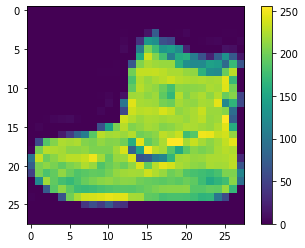

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

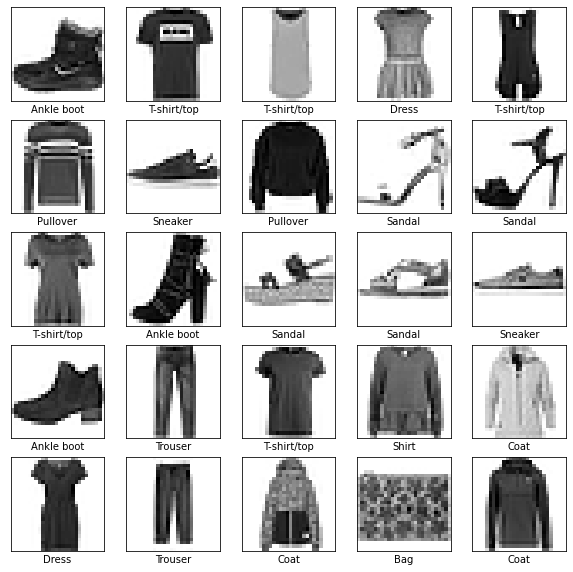

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
)

In [16]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.4993 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 1s 783us/step - loss: 0.3779 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.3376 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 2s 857us/step - loss: 0.3128 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.2953 - accuracy: 0.8919


&lt;tensorflow.python.keras.callbacks.History at 0x140b2fcd0&gt;

In [18]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - loss: 0.3540 - accuracy: 0.8740
Test accuracy: 0.8740000128746033


In [21]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

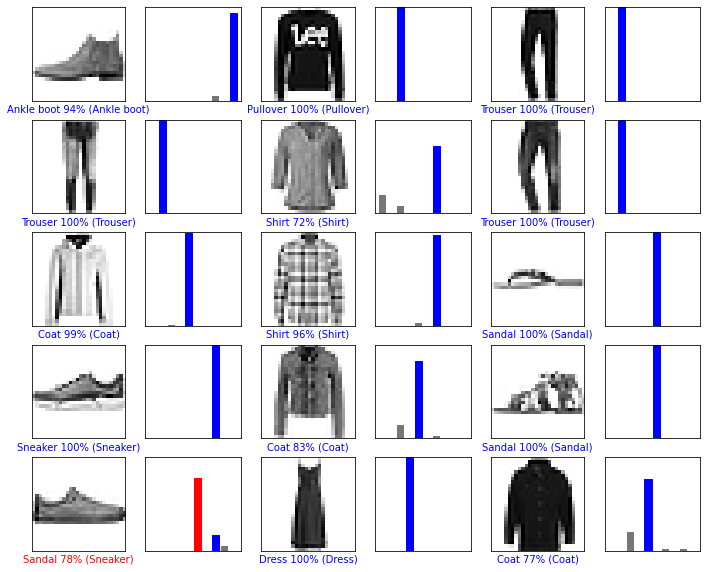

In [24]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()